In [11]:
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

In [48]:
data_file = "amazon_movie.pickle"
movie_df = pd.read_pickle(data_file)

In [49]:
time.mktime(datetime.strptime(time_list[0], "%Y-%m-%d %H:%M:%S").timetuple())

1274745600.0

In [50]:
time_list[0]

'2010-05-24 20:00:00'

In [51]:
time_list = movie_df.timestamp.tolist()
unix_time_list = [time.mktime(datetime.strptime(i,"%Y-%m-%d %H:%M:%S").timetuple()) for i in time_list]

In [52]:
unix_time_list[0]

1274745600.0

In [53]:
movie_df["unixtime"] = unix_time_list

In [54]:
# sorted_df["unixtime"] = sorted_df.timestamp
sorted_df = movie_df.sort_values(by='unixtime', ascending=True)

In [55]:
timestamp_count_list = list(sorted_df.groupby('unixtime').size().to_dict().values())

In [56]:
cum_timestamp_count_list = np.cumsum(timestamp_count_list)
normalize_cum_list = cum_timestamp_count_list/cum_timestamp_count_list[-1]

In [57]:
x = [i for i in range(len(normalize_cum_list))]
x_time = list(sorted_df.groupby('unixtime').size().to_dict().keys())

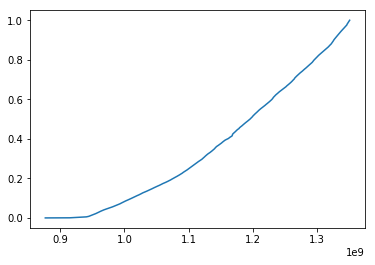

In [58]:
plt.plot(x_time, normalize_cum_list)

In [59]:
action_num = len(sorted_df)
train_action_threshold_index = int(action_num*0.8)
valid_action_threshold_index = int(action_num*0.9)
print("train_action_threshold_index", train_action_threshold_index)
print("valid_action_threshold_index", valid_action_threshold_index)

train_action_threshold_index 800000
valid_action_threshold_index 900000


In [62]:
train_time_threshold = sorted_df.iloc[train_action_threshold_index].unixtime
valid_time_threshold = sorted_df.iloc[valid_action_threshold_index].unixtime
print("train_time_threshold", train_time_threshold)
print("valid_time_threshold", valid_time_threshold)

train_time_threshold 1296000000.0
valid_time_threshold 1326499200.0


In [63]:
train_df = sorted_df[sorted_df.unixtime <= train_time_threshold]
valid_test_df = sorted_df[sorted_df.unixtime > train_time_threshold]
valid_df = valid_test_df[valid_test_df.unixtime <= valid_time_threshold]
test_df = valid_test_df[valid_test_df.unixtime > valid_time_threshold]
print("train num", train_df.shape)
print("valid num", valid_df.shape)
print("test num", test_df.shape)

train num (800140, 4)
valid num (100047, 4)
test num (99814, 4)


In [64]:
remove_item_list = []
item_freq_map = train_df['itemid'].value_counts()
for item, freq in item_freq_map.items():
    if freq < 20:
        remove_item_list.append(item)
remove_item_num = len(remove_item_list)
print("remove item num", remove_item_num, remove_item_num*1.0/len(item_freq_map.keys()))
print("before filtering item num", train_df.itemid.nunique())
train_df = train_df[~train_df.itemid.isin(remove_item_list)]
print("after filtering itemnum", train_df.itemid.nunique())

remove item num 19945 0.7223831944947483
before filtering item num 27610
after filtering itemnum 7665


In [65]:
user_freq_map = train_df.userid.value_counts()
filter_users_num_total = 0

filter_users = user_freq_map[user_freq_map>=300].index
filter_users_num = len(filter_users)
print("filter user actions >=300", filter_users_num)
filter_users_num_total += filter_users_num

train_df = train_df[~train_df.userid.isin(filter_users)]

filter_users = user_freq_map[user_freq_map<=20].index
filter_users_num = len(filter_users)
print("filter user actions <= 20", filter_users_num)
filter_users_num_total += filter_users_num

train_df = train_df[~train_df.userid.isin(filter_users)]

print("filter user num", filter_users_num_total)

filter user actions >=300 78
filter user actions <= 20 221507
filter user num 221585


In [66]:
unique_item_num = train_df.itemid.nunique()
total_action_num = train_df.shape[0]
print("unique item num", unique_item_num)
print("total action num", total_action_num)
print("action num per item", total_action_num*1.0/unique_item_num)

unique item num 7387
total action num 169175
action num per item 22.901719236496547


In [67]:
unique_user_num = train_df.userid.nunique()
total_action_num = train_df.shape[0]
print("unique user num", unique_user_num)
print("total action num", total_action_num)
print("action num per user", total_action_num*1.0/unique_user_num)

unique user num 3113
total action num 169175
action num per user 54.34468358496627


In [68]:
train_userid_list = train_df.userid.unique()
train_df = train_df[train_df.userid.isin(train_userid_list)]
valid_df = valid_df[valid_df.userid.isin(train_userid_list)]
test_df = test_df[test_df.userid.isin(train_userid_list)]

In [69]:
train_itemid_list = train_df.itemid.unique()
train_df = train_df[train_df.itemid.isin(train_itemid_list)]
valid_df = valid_df[valid_df.itemid.isin(train_itemid_list)]
test_df = test_df[test_df.itemid.isin(train_itemid_list)]

In [70]:
sorted_df = pd.concat([train_df, valid_df, test_df])
print("action num", sorted_df.shape)

action num (177218, 4)


In [72]:
sorted_df = sorted_df.sort_values(by=['userid', 'unixtime'], ascending=[True, True])

In [100]:
sorted_df.userid.unique()[:100]

array(['A100JCBNALJFAW', 'A102B8D74H64TO', 'A103KNDW8GN92L',
       'A103QX7NUHBOUF', 'A103W7ZPKGOCC9', 'A106016KSI0YQ',
       'A10872FHIJAKKD', 'A108A421PC6MH3', 'A109LWN9DUGPDP',
       'A10C2SBALDLKU9', 'A10C3IAZUXZ705', 'A10C5CJK1YKGV0',
       'A10CJINP7KBR4W', 'A10DB0H2NZF11E', 'A10E3F50DIUJEE',
       'A10G4BPT5MGBHY', 'A10HHM2684NZD2', 'A10HMPPHWI3V0A',
       'A10JDPEQ8GJ2K1', 'A10L8O1ZMUIMR2', 'A10Q8NIFOVOHFV',
       'A10QUKLNY6C3GC', 'A10VNTUCKHAAIH', 'A10WXN0EFSKHZJ',
       'A10X0JN8KTK89H', 'A10ZE8HITPZ503', 'A111A7GRI52BL6',
       'A1129LM24YWSZV', 'A113YU3OXKSKQU', 'A1183FKPBWTLYL',
       'A11A8GWG0IXBZH', 'A11BCJJG91KVOY', 'A11C43I615R52G',
       'A11ED8O95W2103', 'A11H85UYL2R4KX', 'A11KRMIA0ES88I',
       'A11L5M4MJP00UW', 'A11MNKGD2VLZOB', 'A11RBPGTVNBIBS',
       'A11SPSEM08VIXX', 'A11VG3IJIMJXGV', 'A11XKY4EIU2KNR',
       'A11YV6VC51HJTV', 'A120GIT50UISJP', 'A123FC8GL7US1O',
       'A1241U6QCSX5YJ', 'A125MB4R88JZ5U', 'A129YBX5BVNW2',
       'A12A8LU93A132U', '

In [101]:
item_list_0 = sorted_df[sorted_df.userid=="A10X0JN8KTK89H"].itemid.tolist()

In [106]:
item_list_1 = sorted_df[sorted_df.userid=="A13RM1AWD1C5ZR"].itemid.tolist()

In [107]:
set(item_list_0).intersection(set(item_list_1))

{'B0002NIAZW', 'B0007QS21G', 'B000VDDWE2', 'B001RALGBO'}

In [108]:
sorted_df[sorted_df.userid=="A13RM1AWD1C5ZR"]

,userid,itemid,timestamp,unixtime
38464,A10X0JN8KTK89H,0790701251,2006-03-01 19:00:00,1.141258e+09
52826,A10X0JN8KTK89H,6304198493,2006-03-01 19:00:00,1.141258e+09
75423,A10X0JN8KTK89H,B000065MQO,2006-03-01 19:00:00,1.141258e+09
89056,A10X0JN8KTK89H,B000HOMU98,2006-03-01 19:00:00,1.141258e+09
241733,A10X0JN8KTK89H,B00000J2KT,2006-03-01 19:00:00,1.141258e+09
252295,A10X0JN8KTK89H,B00000JKSV,2006-03-01 19:00:00,1.141258e+09
337497,A10X0JN8KTK89H,B00004RO2M,2006-03-01 19:00:00,1.141258e+09
468138,A10X0JN8KTK89H,B00005MHNS,2006-03-01 19:00:00,1.141258e+09
776999,A10X0JN8KTK89H,B00005V9HH,2006-03-01 19:00:00,1.141258e+09
800754,A10X0JN8KTK89H,B00284BNKC,2006-03-01 19:00:00,1.141258e+09


In [112]:
sorted_df[sorted_df.userid=="A13RM1AWD1C5ZR"].itemid.tolist()

['B001QWQJ4M',
 'B000GW8OAK',
 'B0000AMJEJ',
 'B0018BOAD8',
 'B000171RCC',
 'B0000SX9N2',
 'B002R1W5VW',
 'B0000AGQ6T',
 'B001M9ELP8',
 'B0000UI2NM',
 'B00020JQ76',
 'B001VPJZNQ',
 'B0000VAFO0',
 'B0001KU90U',
 'B0001JXOUS',
 'B0001G6PZC',
 'B0001NBNF2',
 'B000O76T7C',
 'B000BZIT20',
 'B00000F8CT',
 'B000260QGK',
 '6304618344',
 'B00004Z1M1',
 'B00005KG45',
 'B00004VYPW',
 'B007NRBMZU',
 '630395345X',
 '6303953425',
 'B001AQT0Z4',
 '1558908242',
 'B0027WNRVI',
 'B000VDDWE2',
 'B0007QS21G',
 'B001RALGBO',
 'B0002NIAZW',
 'B0002KVUMK',
 'B0002KVUMU',
 'B0002VEUTO',
 'B0002VEUTY',
 'B005ZC1R6O']